# Part II - Loan Data Analysis Presentation
## by Isaac

## Investigation Overview


The major goals of this project are to investigate the numerous factors that influence borrower behavior and to gain insight into the interactions between various variables via the use of data visualizations and summary statistics.e.g state, employement status, monthly income.
Key insights that i focused on was to know how are the loan borrowers are distributed amongst the state and if the populate affects the outcome. Also to know why are borrower borrowing loans since it can show the state of people in a country.

## Dataset Overview

The dataset used for this presentation is the Prosper Loan Dataset, which is America’s lending platform.
his data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, payment information and other.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Top 5 states with most and least number of borrowers  

- The state of CA, is the state with the most number of borrowers, and CA, TX and NY are the top 3 states with the most number of borrowers. The state of ND is the state with the least number of borrowers, and WY, ME and ND are the 3 states with the least number of borrowers.
- Most of the borrowers in CA state are employed depicting that this can be a catalyst for taking a loan

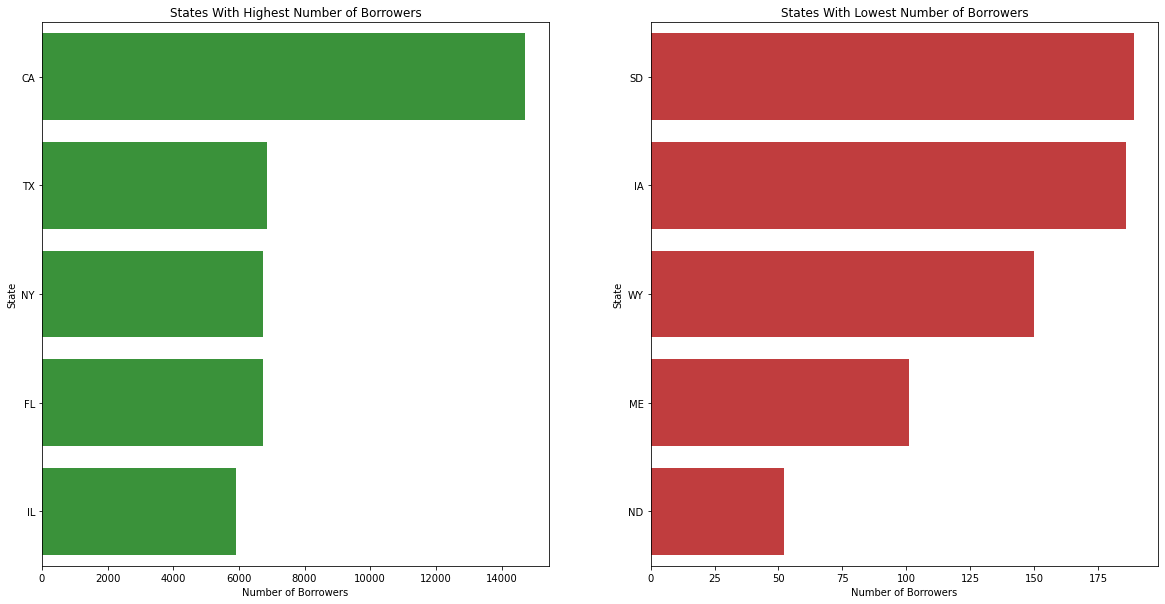

In [13]:
# Converting Loan Date from String to datetime64
df['LoanOriginationDate'] = df['LoanOriginationDate'].astype('datetime64')
# Extracting Year in which Loan Originated
df['LoanOriginationYear'] = pd.DatetimeIndex(df['LoanOriginationDate']).year

most_state_list = df['BorrowerState'].value_counts()[:5].index.tolist()
most_state_count = df['BorrowerState'].value_counts()[:5].values.tolist()

least_state_list = df['BorrowerState'].value_counts()[-5:].index.tolist()
least_state_count = df['BorrowerState'].value_counts()[-5:].values.tolist()
 

plt.figure(figsize = [20, 10])
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[2]

sb.barplot(x=most_state_count, y=most_state_list,color =base_color)
plt.title('States With Highest Number of Borrowers')
plt.xlabel('Number of Borrowers')
plt.ylabel('State')
base_color = sb.color_palette()[3]
plt.subplot(1, 2, 2)
sb.barplot(x=least_state_count, y=least_state_list, color = base_color)
plt.title('States With Lowest Number of Borrowers')
plt.xlabel('Number of Borrowers')
plt.ylabel('State')
plt.show()



Text(0.5, 0, 'No of Borrowers')

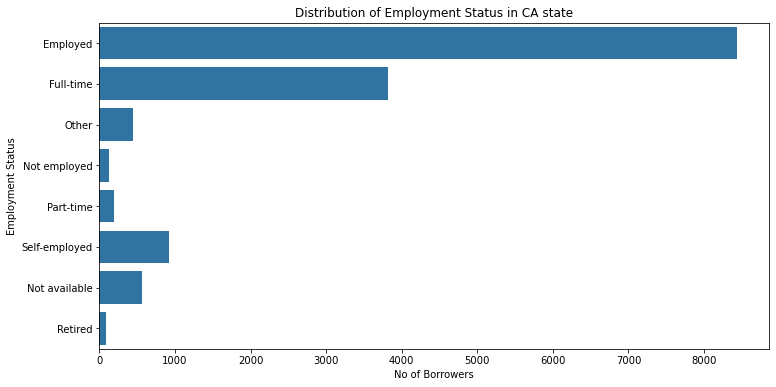

In [14]:
df_ca=df.query("BorrowerState=='CA'")
fig = plt.figure(figsize=(12,6))
base_color = sb.color_palette()[0]
sb.countplot(data=df_ca,y='EmploymentStatus',color = base_color)
plt.title('Distribution of Employment Status in CA state')
plt.ylabel('Employment Status')
plt.xlabel('No of Borrowers')

##  Distribution of Monthly income

- The distribution of stated monthly income is severely right screwed, with most of stated monthly income less than 30k.

Text(0, 0.5, 'Monthly Income')

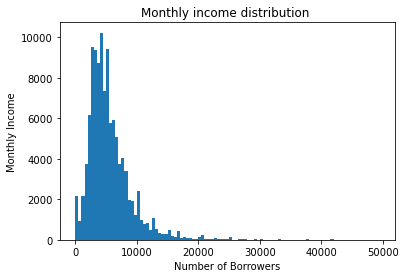

In [18]:
# Distribution of stated monthly income
plt.figsize=(25,16)
bin = np.arange(0, 50000, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bin);
plt.title('Monthly income distribution ')
plt.xlabel('Number of Borrowers')
plt.ylabel('Monthly Income')

##  Prosper Scores based on Monthly income

- It can be observed that there is Strong Positive Correlation between Monthly Income and Prosper Score. The Higher the Monthly Income, Higher the Prosper Score.

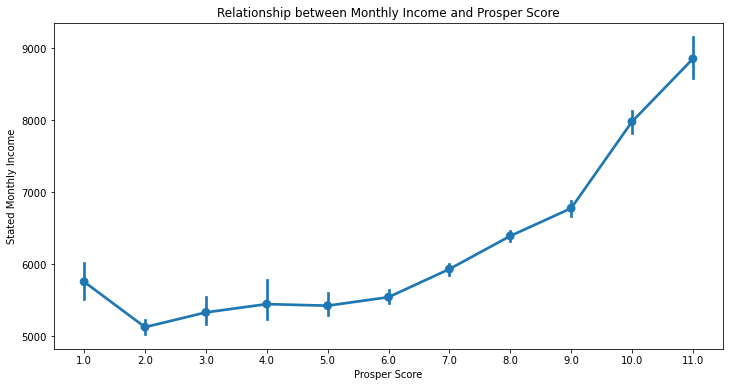

In [16]:
fig = plt.figure(figsize=(12,6))
sb.pointplot(y='StatedMonthlyIncome', x='ProsperScore', data=df)
plt.title('Relationship between Monthly Income and Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Stated Monthly Income')
plt.show()

## Employment Status Distribution 
- Most of the borrowers are Employed, with some of the borrowers being listed as Not Available and Other, whereas only a few of the borrowers were Not Employed.Also, some small number of the borrowers are also Retired.


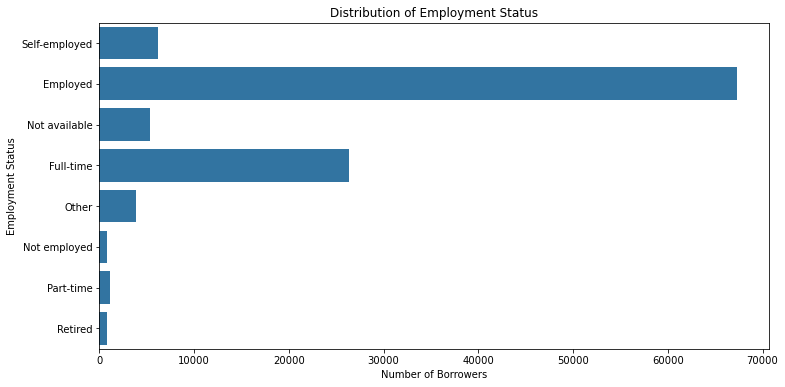

In [8]:
fig = plt.figure(figsize=(12,6))
default_color = sb.color_palette()[0]
sb.countplot(y='EmploymentStatus', data=df,color =default_color)
plt.title('Distribution of Employment Status')
plt.ylabel('Employment Status')
plt.xlabel('Number of Borrowers')
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 